In [2]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as k
import data
import os
import csv
import re
from string import digits

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 


In [5]:
# Define the text file we want to read
MSFT_Sentiment_FILE = 'MSFT_tweets_4m.csv'
file = pd.read_csv(r"MSFT_tweets_4m_tab_2.txt", sep='\t')
file.head()

,DateTime,Tweet Text,Hashtags
0,17/03/2016 19:59,#Microsoft ( $ MSFT) Windows 10 build 14291 no...,#Microsoft
1,17/03/2016 19:58,@majornelson you heard my cries! Thank you #Mi...,#Microsoft #xboxlive
2,17/03/2016 19:58,#Microsoft ( $ MSFT) Edge extensions and more ...,#Microsoft
3,17/03/2016 19:57,#Microsoft ( $ MSFT) upgrades smartphones to W...,#Microsoft
4,17/03/2016 19:57,#Microsoft launches first preview of its Edge ...,#Microsoft #browser #developer #tc #microsoftedge


In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187118 entries, 0 to 187117
Data columns (total 3 columns):
 DateTime      187063 non-null object
 Tweet Text    187067 non-null object
 Hashtags      186995 non-null object
dtypes: object(3)
memory usage: 4.3+ MB


In [7]:
print(file.columns)
tweet_date = file[' DateTime']
tweet_date.sample(n=5)

Index([' DateTime', ' Tweet Text', ' Hashtags'], dtype='object')


49641     26/02/2016 10:47
79231     18/02/2016 04:08
9689      14/03/2016 14:58
182341    07/01/2016 13:42
171223    12/01/2016 17:20
Name:  DateTime, dtype: object

In [8]:
tweet_text = file[' Tweet Text']
tweet_text.sample(n=5)

105554    HTC launches Desire 626 with 13-megapixel rear...
44482     #windows10 November updateÍí_äó_íí_íä...
181946    A new Xbox One update is currently rolling out...
39796     #Microsoft #fillsdeputes ! es volen carregar #...
46311     WhatsWrapp brings WhatsApp notifications to Wi...
Name:  Tweet Text, dtype: object

In [10]:
#Sentiment Analysis

tweet_text.shape[0]
# tweet_text_dict[i] = tweet_text[i].split()


187118

In [11]:
#Set all nan -> '0'
def set_nan_0(tweet_df_col):
    for i in range(tweet_df_col.shape[0]):
        if isinstance(tweet_df_col[i], float):
            tweet_df_col[i] = '0'
    return tweet_df_col

In [12]:
tweet_text = set_nan_0(tweet_text)
tweet_date = set_nan_0(tweet_date)


In [13]:
#Put the tweets into a dict: key=> Date; Val=>Text
tweet_text_dict = {}
for i in range(tweet_text.shape[0]):
        tweet_text_dict[tweet_date[i]] = tweet_text[i].split()

In [14]:
first10pairs = {k: tweet_text_dict[k] for k in list(tweet_text_dict)[:10]}

In [15]:
print(type(first10pairs))
# print(first10pairs)
tweet_token_list = list(tweet_text_dict.values())
tweet_date_list = list(tweet_text_dict.keys())
print(type(tweet_text_dict))
print(type(tweet_token_list))
print(type(tweet_date_list))

<class 'dict'>
<class 'dict'>
<class 'list'>
<class 'list'>


In [19]:
print(len(tweet_token_list[0]))

23


In [17]:
stop_words = set(stopwords.words('english'))
remove_digits = str.maketrans('', '', digits)

def stopword_filter(word_tokens):
    """
    Remove stop words and links
    """
    filtered_sentence = []
    
    for w in word_tokens: 
        w = w.translate(remove_digits)
        w = re.sub(r'http\S+', '', w)
        w = re.sub('[^A-Za-z0-9]+', '', w)
        if w not in stop_words and w != '': 
            filtered_sentence.append(w) 
        
    return filtered_sentence

def english_filter(word_tokens):
    """
    Remove words
    """
    filtered_sentence = []
    w = word_tokens
    w = re.sub(r'#\S+', '', w)
    w = re.sub('[^/0-9]+', '', w)
    filtered_sentence.append(w) 
        
    return filtered_sentence

In [18]:
tweet_token_list_fil_1 = []
for i in range(len(tweet_token_list)):
    tweet_token_list_fil_1.append(stopword_filter(tweet_token_list[i]))
    

In [19]:
for i in range(len(tweet_date_list)):
    tweet_date_list[i] = tweet_date_list[i].split()[0]
print(len(tweet_date_list)); print(len(tweet_token_list_fil_1))

72791
72791


In [20]:
tweet_date_list_fil_1 = []
for i in range(len(tweet_date_list)):
    tweet_date_list_fil_1 += (english_filter(tweet_date_list[i]))
print(len(tweet_date_list_fil_1)); print(len(tweet_token_list_fil_1))


72791
72791


In [112]:
new_dict = {}

for i in range(len(tweet_date_list)):
    new_dict[tweet_date_list_fil_1[i]] = []

for i in range(len(tweet_date_list)):
    new_dict[tweet_date_list_fil_1[i]] += tweet_token_list_fil_1[i]


In [58]:
len(new_dict['17/03/2016'])
len(new_dict['0'])
len(new_dict[''])

17

In [59]:
len(new_dict['03/03/2016'])

10479

In [60]:
new_dict.keys()

dict_keys(['17/03/2016', '0', '', '16/03/2016', '15/03/2016', '14/03/2016', '13/03/2016', '12/03/2016', '11/03/2016', '10/03/2016', '09/03/2016', '08/03/2016', '07/03/2016', '06/03/2016', '05/03/2016', '04/03/2016', '20160304', '20160', '201603', '03/03/2016', '02/03/2016', '01/03/2016', '29/02/2016', '28/02/2016', '27/02/2016', '26/02/2016', '25/02/2016', '24/02/2016', '23/02/2016', '22/02/2016', '21/02/2016', '20/02/2016', '19/02/2016', '18/02/2016', '20160218', '201602', '17/02/2016', '16/02/2016', '15/02/2016', '14/02/2016', '13/02/2016', '12/02/2016', '11/02/2016', '10/02/2016', '09/02/2016', '08/02/2016', '07/02/2016', '06/02/2016', '05/02/2016', '04/02/2016', '03/02/2016', '02/02/2016', '01/02/2016', '31/01/2016', '30/01/2016', '29/01/2016', '28/01/2016', '27/01/2016', '26/01/2016', '25/01/2016', '24/01/2016', '23/01/2016', '22/01/2016', '21/01/2016', '20/01/2016', '19/01/2016', '18/01/2016', '17/01/2016', '16/01/2016', '15/01/2016', '14/01/2016', '13/01/2016', '12/01/2016', '11

In [61]:
terms_volume = {}

for key in new_dict.keys():
    terms_volume[key] = len(new_dict[key])



In [96]:
key_del = []
for key, val in terms_volume.items():
    if val == 0:
        key_del.append(key)
        
for i in key_del:
    del terms_volume[i]


In [116]:
for i in key_del:
    del new_dict[i]

KeyError: '20160304'

In [117]:
del new_dict['']; del new_dict['0']
new_dict.keys()

dict_keys(['17/03/2016', '16/03/2016', '15/03/2016', '14/03/2016', '13/03/2016', '12/03/2016', '11/03/2016', '10/03/2016', '09/03/2016', '08/03/2016', '07/03/2016', '06/03/2016', '05/03/2016', '04/03/2016', '03/03/2016', '02/03/2016', '01/03/2016', '29/02/2016', '28/02/2016', '27/02/2016', '26/02/2016', '25/02/2016', '24/02/2016', '23/02/2016', '22/02/2016', '21/02/2016', '20/02/2016', '19/02/2016', '18/02/2016', '17/02/2016', '16/02/2016', '15/02/2016', '14/02/2016', '13/02/2016', '12/02/2016', '11/02/2016', '10/02/2016', '09/02/2016', '08/02/2016', '07/02/2016', '06/02/2016', '05/02/2016', '04/02/2016', '03/02/2016', '02/02/2016', '01/02/2016', '31/01/2016', '30/01/2016', '29/01/2016', '28/01/2016', '27/01/2016', '26/01/2016', '25/01/2016', '24/01/2016', '23/01/2016', '22/01/2016', '21/01/2016', '20/01/2016', '19/01/2016', '18/01/2016', '17/01/2016', '16/01/2016', '15/01/2016', '14/01/2016', '13/01/2016', '12/01/2016', '11/01/2016', '10/01/2016', '09/01/2016', '08/01/2016', '07/01/20

In [97]:
terms_volume.keys()

dict_keys(['17/03/2016', '16/03/2016', '15/03/2016', '14/03/2016', '13/03/2016', '12/03/2016', '11/03/2016', '10/03/2016', '09/03/2016', '08/03/2016', '07/03/2016', '06/03/2016', '05/03/2016', '04/03/2016', '03/03/2016', '02/03/2016', '01/03/2016', '29/02/2016', '28/02/2016', '27/02/2016', '26/02/2016', '25/02/2016', '24/02/2016', '23/02/2016', '22/02/2016', '21/02/2016', '20/02/2016', '19/02/2016', '18/02/2016', '17/02/2016', '16/02/2016', '15/02/2016', '14/02/2016', '13/02/2016', '12/02/2016', '11/02/2016', '10/02/2016', '09/02/2016', '08/02/2016', '07/02/2016', '06/02/2016', '05/02/2016', '04/02/2016', '03/02/2016', '02/02/2016', '01/02/2016', '31/01/2016', '30/01/2016', '29/01/2016', '28/01/2016', '27/01/2016', '26/01/2016', '25/01/2016', '24/01/2016', '23/01/2016', '22/01/2016', '21/01/2016', '20/01/2016', '19/01/2016', '18/01/2016', '17/01/2016', '16/01/2016', '15/01/2016', '14/01/2016', '13/01/2016', '12/01/2016', '11/01/2016', '10/01/2016', '09/01/2016', '08/01/2016', '07/01/20

In [98]:
vol_1 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i < len(terms_volume)/4}
vol_2 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i >= len(terms_volume)/4 and i <= len(terms_volume)/2}
vol_3 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i >= len(terms_volume)/2 and i <= len(terms_volume)*3/4}
vol_4 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i >= len(terms_volume)*3/4}


In [99]:
print(vol_1.keys())

dict_keys(['17/03/2016', '16/03/2016', '15/03/2016', '14/03/2016', '13/03/2016', '12/03/2016', '11/03/2016', '10/03/2016', '09/03/2016', '08/03/2016', '07/03/2016', '06/03/2016', '05/03/2016', '04/03/2016', '03/03/2016', '02/03/2016', '01/03/2016', '29/02/2016', '28/02/2016', '27/02/2016', '26/02/2016', '25/02/2016', '24/02/2016', '23/02/2016', '22/02/2016', '21/02/2016', '20/02/2016', '19/02/2016', '18/02/2016'])


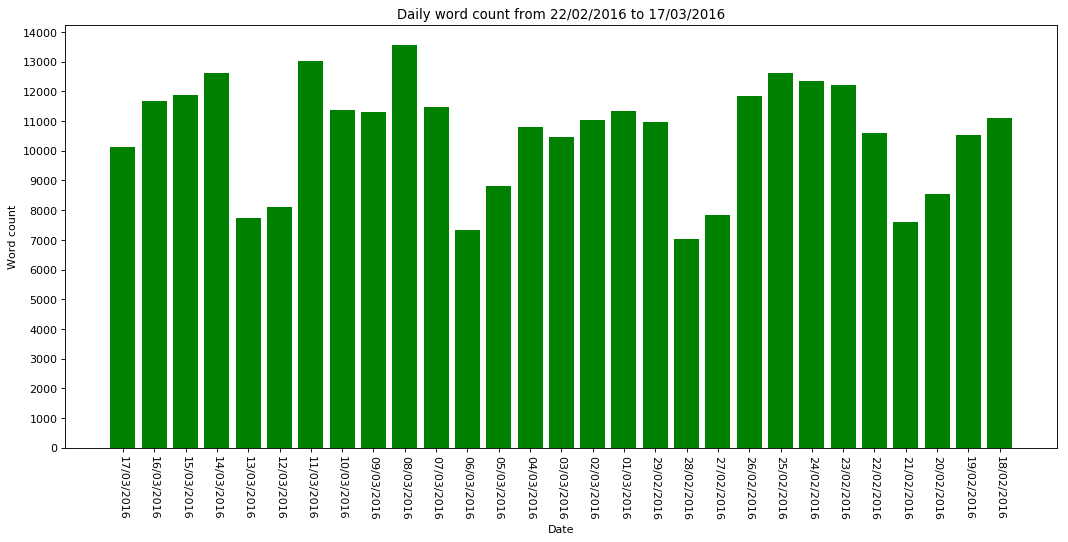

In [100]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(vol_1.keys(), vol_1.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 15000, step = 1000))
plt.xlabel('Date')
plt.ylabel('Word count')
plt.title('Daily word count from 22/02/2016 to 17/03/2016')
plt.savefig('date_volumne1.pdf')

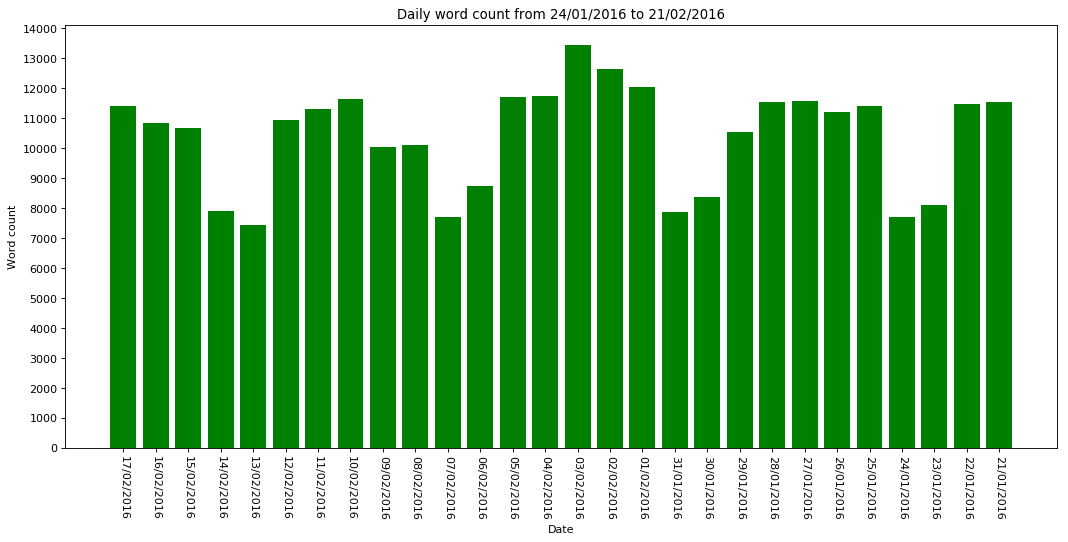

In [105]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(vol_2.keys(), vol_2.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 15000, step = 1000))
plt.xlabel('Date')
plt.ylabel('Word count')
plt.title('Daily word count from 24/01/2016 to 21/02/2016')
plt.savefig('date_volumne2.pdf')

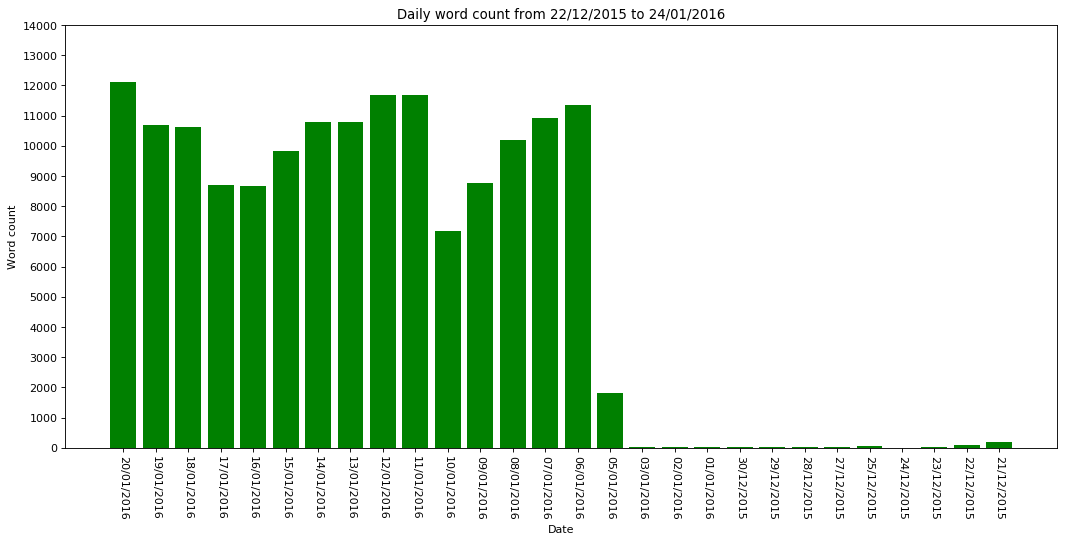

In [102]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(vol_3.keys(), vol_3.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 15000, step = 1000))
plt.title('Daily word count from 22/12/2015 to 24/01/2016')
plt.xlabel('Date')
plt.ylabel('Word count')
plt.savefig('date_volumne3.pdf')

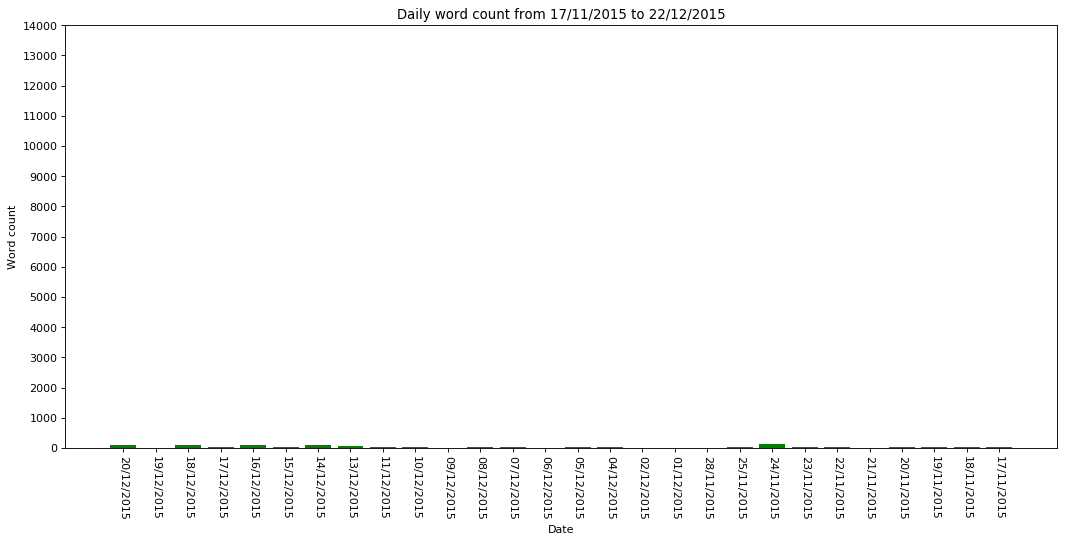

In [106]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(vol_4.keys(), vol_4.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 15000, step = 1000))
plt.title('Daily word count from 17/11/2015 to 22/12/2015')
plt.xlabel('Date')
plt.ylabel('Word count')
plt.savefig('date_volumne4.pdf')

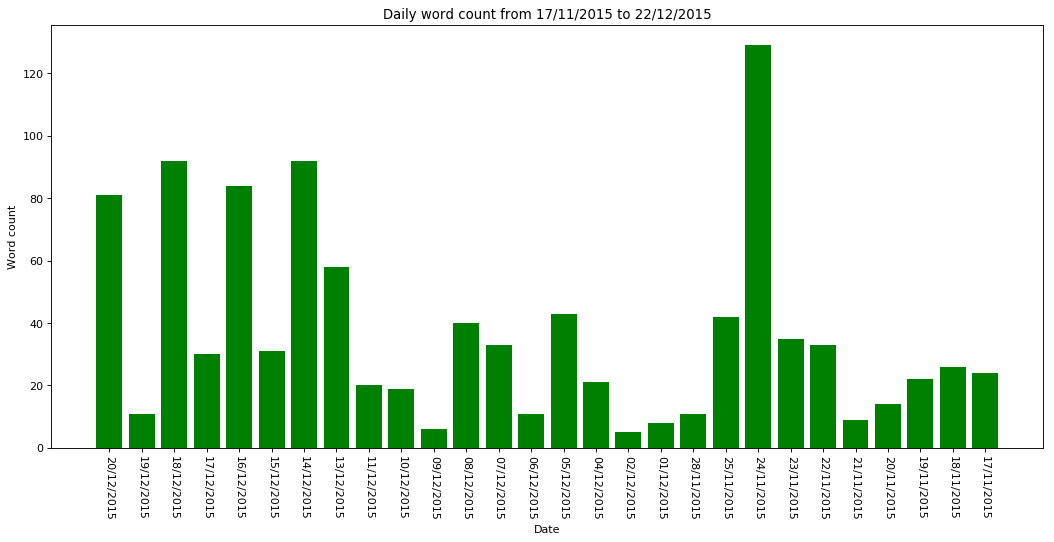

In [107]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(vol_4.keys(), vol_4.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
# plt.yticks(np.arange(0 , 15000, step = 1000))
plt.title('Daily word count from 17/11/2015 to 22/12/2015')
plt.xlabel('Date')
plt.ylabel('Word count')
plt.savefig('date_volumne4_2.pdf')

In [118]:
new_dict.keys()

dict_keys(['17/03/2016', '16/03/2016', '15/03/2016', '14/03/2016', '13/03/2016', '12/03/2016', '11/03/2016', '10/03/2016', '09/03/2016', '08/03/2016', '07/03/2016', '06/03/2016', '05/03/2016', '04/03/2016', '03/03/2016', '02/03/2016', '01/03/2016', '29/02/2016', '28/02/2016', '27/02/2016', '26/02/2016', '25/02/2016', '24/02/2016', '23/02/2016', '22/02/2016', '21/02/2016', '20/02/2016', '19/02/2016', '18/02/2016', '17/02/2016', '16/02/2016', '15/02/2016', '14/02/2016', '13/02/2016', '12/02/2016', '11/02/2016', '10/02/2016', '09/02/2016', '08/02/2016', '07/02/2016', '06/02/2016', '05/02/2016', '04/02/2016', '03/02/2016', '02/02/2016', '01/02/2016', '31/01/2016', '30/01/2016', '29/01/2016', '28/01/2016', '27/01/2016', '26/01/2016', '25/01/2016', '24/01/2016', '23/01/2016', '22/01/2016', '21/01/2016', '20/01/2016', '19/01/2016', '18/01/2016', '17/01/2016', '16/01/2016', '15/01/2016', '14/01/2016', '13/01/2016', '12/01/2016', '11/01/2016', '10/01/2016', '09/01/2016', '08/01/2016', '07/01/20

In [122]:
new_pd =  pd.DataFrame({k: pd.Series(l) for k, l in new_dict.items()})

In [125]:
print(new_pd.shape)

(13557, 113)


In [127]:
new_pd.sample(n=5)

,17/03/2016,16/03/2016,15/03/2016,14/03/2016,13/03/2016,12/03/2016,11/03/2016,10/03/2016,09/03/2016,08/03/2016,...,28/11/2015,25/11/2015,24/11/2015,23/11/2015,22/11/2015,21/11/2015,20/11/2015,19/11/2015,18/11/2015,17/11/2015
10654,NaN,blog,rival,amazing,NaN,NaN,past,andra,good,test,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,Great,Australia,Xbox,microsoft,Bitcoins,adds,Lim,Microsoft,businessintelligence,lineup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2895,microsoft,Acquiring,Technica,completed,Microsoft,NabdApp,toolbar,microsoft,computer,says,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10402,NaN,also,bitcoin,computing,NaN,NaN,Linux,Event,World,PepperMicrosoft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9630,industries,Office,TI,met,NaN,NaN,IU,company,Microsoft,Server,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
new_pd_2 = new_pd.T
print(new_pd_2.shape)
new_pd_2.sample(n=5)

(113, 13557)


,0,1,2,3,4,5,6,7,8,9,...,13547,13548,13549,13550,13551,13552,13553,13554,13555,13556
09/01/2016,QA,Monday,Windows,Hide,Accounts,Welcome,Menu,Microsoft,Dubai,teams,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/02/2016,Microsoft,officially,acquiring,SwiftKey,tech,How,send,free,text,messages,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22/11/2015,Its,Monday,Here,tips,help,increase,productivity,Outlook,microsoft,anncios,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18/01/2016,mmorpgfeatures,microsoft,leagueoflegends,api,mobile,gadgets,ipadgames,Microsoft,issued,terrifying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13/12/2015,Heres,display,full,messages,images,Outlook,Mail,WindowsMobile,Microsoft,via,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
new_pd.to_csv('clean_msft_tweets_4m_v.csv')
new_pd_2.to_csv('clean_msft_tweets_4m_h.csv')